# Mentale Gezondheid

Student names: Justin van Egmond, Noor Verbrugge & Douwe Maljers

Team number: 32

In [1]:
import pandas as pd
import plotly.express as px
from ipywidgets import Dropdown, SelectionSlider, Layout, HBox, VBox, interactive_output
from IPython.display import display, HTML
import pycountry

# === Data inladen ===
csv_path = "datasets/IHME_mental_real.csv"
df2 = pd.read_csv(csv_path)

# === Landen omzetten naar ISO3-codes ===
def get_iso3(name):
    try:
        return pycountry.countries.lookup(name).alpha_3
    except LookupError:
        return None

df2["Country"] = df2["location"].apply(get_iso3)

# === Waarden in juiste schaal zetten ===
df2["val_display"] = df2["val"]
df2.loc[df2["metric"] == "Percent", "val_display"] *= 100

# === Vaste schaal voor percentages ===
percent_max = df2.loc[df2["metric"] == "Percent", "val_display"].max()

# === Widget opties ===
years = sorted(df2["year"].unique())
sexes = sorted(df2["sex"].unique())
metrics = sorted(df2["metric"].unique())

# === Plotfunctie ===
def plot_map(year, sex, metric):
    dff = df2[(df2["year"] == year) & (df2["sex"] == sex) & (df2["metric"] == metric)]
    print(f'y: {year} sex: {sex}')
    if dff.empty:
        print("Geen data beschikbaar voor deze selectie.")
        return
    
    if metric == "Percent":
        color_range = [0, percent_max]
    else:
        color_range = [df2["val_display"].min(), df2["val_display"].max()]
    
    fig = px.choropleth(
        dff,
        locations="Country",
        color="val_display",
        hover_name="location",
        color_continuous_scale="Reds",
        range_color=color_range,
        labels={"val_display": f"Prevalentie ({metric})"},
        title=f"Mental Disorders – {sex} – {metric} – {year}",
        width=1100,
        height=650
    )
    fig.update_layout(
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="natural earth"
        ),
        margin=dict(l=0, r=0, t=50, b=0)
    )
    fig.show()

# === Widgets ===
year_slider = SelectionSlider(
    options=years,
    description="Jaar",
    continuous_update=False,
    layout=Layout(width="100%")
)

sex_dropdown = Dropdown(
    options=sexes,
    description="Sex",
    layout=Layout(width="200px")
)

metric_dropdown = Dropdown(
    options=metrics,
    description="Metric",
    layout=Layout(width="200px")
)

controls_top = HBox([sex_dropdown, metric_dropdown], layout=Layout(gap="20px"))
controls = VBox([controls_top, year_slider], layout=Layout(gap="15px", width="1000px"), _dom_classes=["vbox"])

interactive_plot = interactive_output(plot_map, {
    "year": year_slider,
    "sex": sex_dropdown,
    "metric": metric_dropdown
})

# === Styling met CSS ===
custom_css = """
<style>
.vbox {
    background-color: #f9f9f9;
    padding: 20px;
    border-radius: 12px;
    box-shadow: 0 0 10px rgba(0,0,0,0.1);
    width: fit-content;
    margin-bottom: 25px;
}

/* Dropdown styling */
.widget-dropdown select {
    background-color: white;
    border: 1px solid #ccc;
    border-radius: 8px;
    padding: 6px 12px;
    font-size: 14px;
}

/* Slider track */
.widget-selection-slider .slider {
    background-color: #ddd;
    height: 8px;
    border-radius: 4px;
}

/* Slider handle */
.widget-selection-slider .slider .slider-handle {
    background-color: #e74c3c;
    border-radius: 50%;
    width: 16px;
    height: 16px;
    margin-top: -4px;
}

/* Beschrijving labels */
.widget-label {
    font-weight: bold;
    font-size: 14px;
}

/* Responsive tweaks */
@media screen and (max-width: 768px) {
    .hbox {
        flex-direction: column !important;
        gap: 10px !important;
    }
}
</style>
"""

# === Weergeven ===
display(HTML(custom_css))
display(controls, interactive_plot)


Output()

> *Figuur 1: Interactieve kaart van wereldwijde cijfers over mentale klachten.*

## Introductie

Het gebruik van sociale media is de laatste jaren in enorm tempo toegenomen. Alhoewel het gebruik van sociale media de mogelijkheid biedt voor voorbending en entertainment, echter lijkt het gebruik hiervan ook een keerzijde te hebben. Tal van studies tonen aan dat excessief sociale media gebruik samenhangt met verminderde mentale gezondheid. Zo leggen studies het verband tussen sociale mediaverslaving en mentale problemen, als depressie en angststoornissen (Ergün et al., 2023). Desalniettemin zijn er ook studies die het overtuigt zijn, dat dit verband in werkelijk niet bestaat. Zo concludeert Huang (2018) uit een meta-analyse dat het bestaan van dit verband te snel wordt getrokken en dubieus van aard is. 
Nadat er vanuit artsen, wetenschappers en deskundigen een brandbrief werd verstuurd met een oproep tot regelgeving omtrent smartphone bezit en sociale media gebruik, komt de Nederlandse politiek binnenkort met een richtlijn omtrent dit  (NOS, 2025). In hoeverre is de invoering van deze richtlijnen terecht? Zijn richtlijnen alleen voor kinderen nodig of mooeten deze voor de hele samenleving gelden?

Wereldwijd is de populatie met mentale stoornissen significant gestegen. In de grafiek boven is per land de trend te zien. Vandaar dat dit onderzoek nog meer van belang is. Vrouwen en mannen zijn beide slachtoffer van deze chronische ziekte. 

In dit onderzoek worden beide standpunten onderbouwd aan de hand van data visualisaties, specifiek gericht op sociale mediaverslaving onder studenten. Dit wordt gedaan met behulp van verschillende datasets van diverse groepen studenten. Tevens wordt een dataset van het Institute for Health Metrics and Evaluation gebruikt om de grootschaligheid van het wereldwijde probleem van mentale stoornissen en verminderde mentale gesteldheid in kaart te brengen.

## Dataset and Preprocessing

Voor ons onderzoek hebben we veel achtergrond informatie opgezocht om de juiste data te vinden. In veel datasets omtremd mentale gezondheid zijn simulaties gebruikt en gegevens nagebootst. Om nuttige correlaties te vinden in de variabelen hebben we elke set goed bestudeerd of er realistische situaties zijn gebruikt. Er zijn drie datasets gebruikt. Daar is voor gekozen omdat veel goede datasets erg specifiek zijn, met consequentie dat er niet veel variabelen maar wel veel informatie te vinden is. 

De dataset van het Institute for Health Metrics and Evaluation is een dataset van de GBD (Global Burden of Disease) studie uit 2021. Deze studie is het grootste en meest uitgebreide onderzoek om gezondheidsverlies op verschillende plaatsen en in de loop van de tijd te kwantificeren. Zo vormt de gevonden data een krachtig middel om inzichten te creëren voor inzichten omtrent globale gezondheidstrends en -uitdagingen (Global Burden of Disease (GBD), n.d.). De dataset is gevonden via https://vizhub.healthdata.org/gbd-results/ , waar de data gefilterd kan worden naar de schattingen van de prevalentie, of andere statistieken, mentale stoornissen.

De dataset Social Media Addiction vs. Relationship is afkomstig van Kaggle. Deze specifieke dataset brengt de mogelijke verbanden in kaart tussen sociale media gebruik, verslavingskenmerken en de kwaliteit van sociale relaties. De gegevens zijn verzameld via een online enquête en bevatten variabelen zoals de frequentie van socialmediagebruik, ervaren afhankelijkheid, relationele conflicten en emotionele beschikbaarheid. Dit biedt onderzoekers een toegankelijke bron voor het verkennen van hedendaagse digitale gedragsdynamieken binnen sociale contexten (Adil Shamim, n.d.). De dataset is beschikbaar via https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships, waar de ruwe data kan worden gedownload voor verdere kwantitatieve analyse.

De dataset Student Mental Health Survey is ook afkomstig van Kaggle en biedt inzicht in de mentale gezondheid van studenten in relatie tot factoren als academische druk, slaapgewoonten en sociale steun. De data zijn verzameld via een online vragenlijst en bevatten variabelen zoals het al dan niet zoeken van psychologische hulp, ervaren stressniveaus en copingmechanismen. De dataset vormt een toegankelijke bron voor het analyseren van trends in studentenwelzijn en kan bijdragen aan beleidsvorming of interventieontwikkeling binnen het hoger onderwijs (Abdullah Ashfaq Virk, n.d.). De gegevens zijn te vinden via https://www.kaggle.com/datasets/abdullahashfaqvirk/student-mental-health-survey, waar ze direct beschikbaar zijn voor download en verdere analyse.





## Het gebruik van sociale media veroorzaakt diverse problemen

In het dagelijks gebruik zijn sociale media niet weg te krijgen. Het is een nieuwe norm geworden, wanneer men iets ziet dat te delen online. Vroeger had men vooral contact als ze elkaar fysiek zagen. Dat geeft ook een druk op mensen om altijd beschikbaar te zijn. In die tijd zouden ze eigenlijk met andere dingen bezig moeten zijn. Hun aandacht, focus en behoeftes worden geschoven, wat zorgt voor een verschuiving in prioriteiten. Een argument daarbij is dan ook dat het gebruik van sociale media diversie problemen veroorzaakt, zoals slechter presteren op school, slaapproblemen en internetverslaving.


### Schoolprestatie

Studenten zijn al langer bekend om gevoelig te zijn voor mentale stoornissen. Door hoge studielast, sociale druk en financiële moeilijkheden staan zijn erg onder druk. Ook zijn jongeren meer actief op sociale media en worden daardoor ook beïnvloed. Veel studenten geven aan dat hun studieprestaties negatief worden beïnvloed door sociale media. Studenten die aangeven academisch beïnvloed te worden, gebruiken sociale media vaker. 

Path to dataset files: C:\Users\Douwe Maljers\.cache\kagglehub\datasets\adilshamim8\social-media-addiction-vs-relationships\versions\3


C:\Users\Douwe Maljers\AppData\Local\Temp\ipykernel_14784\1989849081.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




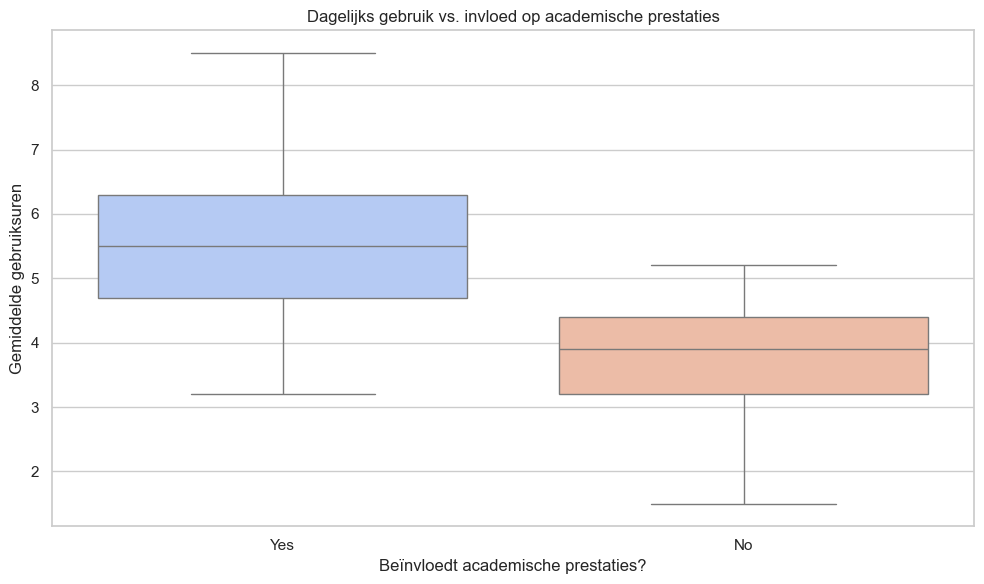

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
import os

import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")

print("Path to dataset files:", path)
csv_path = os.path.join(path, "Students Social Media Addiction.csv") 
df4 = pd.read_csv(csv_path)

# Algemene stijl
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

plt.figure()
sns.boxplot(
    data=df4,
    x="Affects_Academic_Performance",
    y="Avg_Daily_Usage_Hours",
    palette="coolwarm"
)
plt.title("Dagelijks gebruik vs. invloed op academische prestaties")
plt.xlabel("Beïnvloedt academische prestaties?")
plt.ylabel("Gemiddelde gebruiksuren")
plt.tight_layout()
plt.show()

> *Figuur 2: De correlatie tussen het de gemiddelde gebruiksuren van sociale media en of de student vind dat de acadmische prestatie worden beïnvloed.*

In de tekst boven is de data te zien van studenten die aangeven of hun academische prestaties worden aangetast door het overmatig gebruik van sociale media. In de linker kolom is een significant hoger aantal studenten te zien die wel vindt dat zijn of haar scores minderen. Uit zelf reflectie is een punt te halen dat sociale media een probleem is en niet een vrijwillige actie is. De mentale gezondheid van de student kan hier ook onder lijden door de algoritmes van de apps.

In [4]:
import pandas as pd
import plotly.graph_objects as go

# Laad data
df = pd.read_csv("datasets/MentalHealthSurvey.csv")

# Schoon CGPA-categorieën op
df['cgpa'] = df['cgpa'].str.strip()

# Relevante mentale gezondheidsdimensies
mental_columns = ['depression', 'anxiety', 'isolation', 'future_insecurity', 'academic_pressure']

# Bereken gemiddelden per CGPA-groep
grouped = df.groupby('cgpa')[mental_columns].mean()

# Sorteer in logische volgorde
cgpa_order = ['<2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']
grouped = grouped.loc[[g for g in cgpa_order if g in grouped.index]]

# Maak radar chart
fig = go.Figure()

for cgpa in grouped.index:
    fig.add_trace(go.Scatterpolar(
        r=grouped.loc[cgpa].values,
        theta=mental_columns,
        fill='toself',
        name=f'CGPA {cgpa}'
    ))

fig.update_layout(
    title='Mentale Gezondheid per CGPA-groep',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 5]
        )
    ),
    showlegend=True
)

fig.show()



> *Figuur 3: Weergave van de effecten van verschillende effecten op de gemiddeld behaalde cijfers van studenten.*

Zoals eerder benoemd heeft academische druk niet alleen gevolgen op de academische scores maar ook de mentale gezondheid van studenten. Studenten die meer werken voor hoge cijfers hebben sneller last van mentale klachten zoals depressie en stress. Ook is af te lezen dat studenten lagere cijfers sneller geneigd zijn om onzeker te zijn. De studententijd is een tijd waar mensen zich kunnen ontwikkelen en groeien tot de persoon die ze met zelfverzekerheid willen worden. Ook is de prestatiedruk voor studenten met lage cijfer immens hoog.

### Sociale Media

Daarnaast scoren studenten met een hoger dagelijks gebruik vaak lager op mentale gezondheid. Meer gebruik hangt vaak samen met een lagere mentale gezondheidsscore 

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub

path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)
df = df.dropna(subset=["Avg_Daily_Usage_Hours", "Mental_Health_Score", "Gender"])

genders = ["Male", "Female"]
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om scatter + regressielijn trace te maken
def get_traces(gender=None):
    if gender:
        d = df[df["Gender"] == gender]
        label = gender
    else:
        d = df
        label = "All"

    # Regressielijn berekenen
    x = d["Avg_Daily_Usage_Hours"]
    y = d["Mental_Health_Score"]
    slope, intercept = np.polyfit(x, y, 1)
    x_vals = np.linspace(x.min(), x.max(), 100)
    y_vals = slope * x_vals + intercept

    # Scatter trace
    scatter = go.Scatter(
        x=x, y=y,
        mode='markers',
        name=f"{label} - data",
        marker=dict(color=colors[label], opacity=0.6),
        showlegend=True
    )

    # Lijn trace
    line = go.Scatter(
        x=x_vals, y=y_vals,
        mode='lines',
        name=f"{label} - trend",
        line=dict(color=colors[label], width=2, ),
        showlegend=True
    )

    return scatter, line

# Maak alle traces aan (elk 2: scatter + line)
male_traces = get_traces("Male")
female_traces = get_traces("Female")
all_traces = get_traces(None)
all_plot_traces = [*male_traces, *female_traces, *all_traces]

# Dropdown menu logica
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, True, False, False, False, False]},
               {"title": "Social media gebruik vs. mentale gezondheid (mannen)"}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, False, True, True, False, False]},
               {"title": "Social media gebruik vs. mentale gezondheid (vrouwen)"}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, False, False, True, True]},
               {"title": "Social media gebruik vs. mentale gezondheid (alle studenten)"}])
]

# Plot figuur
fig = go.Figure(data=all_plot_traces)

fig.update_layout(
    title="Social media gebruik vs. mentale gezondheid",
    xaxis_title="Gemiddeld aantal gebruiksuren van social media per dag",
    yaxis_title="Mentale gezondheidsscore",
    updatemenus=[dict(active=0, buttons=buttons, x=1.15)]
)

fig.show()


> *Figure 4: Gebruik van sociale media en de mentale gezondheid van mannen en vrouwen.*

De bovenstaande grafiek toont het verband tussen de gemiddelde dagelijkse social media uren per dag (x-as) en de mentale gezondheidsscore van studenten (y-as). Er is een duidelijke negatieve trend zichtbaar in de regessielijn, bij zowel mannen als vrouwen. De mentale gezondheidsscoren daalt naarmate het aantal social media uren meer wordt. Dit betekent dat hoe meer tijd studenten gemiddeld per dag op social media doorbrengen, hoe lager hun mentale gezondheidsscore gemiddeld is, dus meer social media gebruik hangt samen met slechtere mentale gezondheid.

### Slaapgedrag

Mentale gezondheid wordt sterk beïnvloedt door het slaapgedrag.

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import os
import kagglehub

# Dataset ophalen
path = kagglehub.dataset_download("adilshamim8/social-media-addiction-vs-relationships")
csv_path = os.path.join(path, "Students Social Media Addiction.csv")
df = pd.read_csv(csv_path)

# Filter op leeftijd en geldige waarden
df_filtered = df[(df['Age'] >= 18) & (df['Age'] <= 25)]
df_filtered = df_filtered.dropna(subset=["Mental_Health_Score", "Sleep_Hours_Per_Night", "Gender"])

# Kleuren
colors = {"Male": "blue", "Female": "deeppink", "All": "green"}

# Functie om groepsgemiddelde lijntrace te maken
def get_line_trace(gender=None):
    if gender:
        d = df_filtered[df_filtered["Gender"] == gender]
        label = gender
    else:
        d = df_filtered
        label = "All"

    df_avg = d.groupby("Sleep_Hours_Per_Night")["Mental_Health_Score"].mean().reset_index()

    return go.Scatter(
        x=df_avg["Sleep_Hours_Per_Night"],
        y=df_avg["Mental_Health_Score"],
        mode='lines+markers',
        name=label,
        line=dict(color=colors[label], width=3),
        visible=True if label == "Male" else False  # standaard alleen Male tonen
    )

# Genereer traces
male_line = get_line_trace("Male")
female_line = get_line_trace("Female")
all_line = get_line_trace(None)

# Dropdown-menu
buttons = [
    dict(label="Man",
         method="update",
         args=[{"visible": [True, False, False]},
               {"title": "Gemiddelde mentale gezondheid per slaapduur (mannen)"}]),
    dict(label="Vrouw",
         method="update",
         args=[{"visible": [False, True, False]},
               {"title": "Gemiddelde mentale gezondheid per slaapduur (vrouwen)"}]),
    dict(label="Iedereen",
         method="update",
         args=[{"visible": [False, False, True]},
               {"title": "Gemiddelde mentale gezondheid per slaapduur (alle studenten)"}])
]

# Plot figuur
fig = go.Figure(data=[male_line, female_line, all_line])

fig.update_layout(
    title="Gemiddelde mentale gezondheid per slaapduur",
    xaxis_title="Aantal uren slaap per nacht",
    yaxis_title="Gemiddelde mentale gezondheidsscore",
    updatemenus=[dict(active=0, buttons=buttons, x=1.15)]
)

fig.show()



> *Figure 8: Verschil per geslacht over mentale gezondheid en slaapuren.*

De bovenstaande grafiek toont het verband tussen het aantal uren slaap per nacht (x-as) en de mentale gezondheidsscore van studenten (y-as). Er is een duidelijke positieve trend zichtbaar in de regessielijn, bij zowel mannen als vrouwen. De mentale gezondheidsscoren stijgt naarmate het aantal uren slaap meer wordt. Dit betekent dat hoe meer uren slaap studenten krijgen, hoe hoger hun mentale gezondheidsscore gemiddeld is, dus meer slaap hangt samen met betere mentale gezondheid.

## Sport Gewoontes

In [ ]:
import kagglehub
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Download latest version
path = kagglehub.dataset_download("abdullahashfaqvirk/student-mental-health-survey")

# print("Path to dataset files:", path)

csv_path = os.path.join(path, "MentalHealthSurvey.csv") 
df = pd.read_csv(csv_path)
# print(df.head(n=5))

df['sports_engagement'] = pd.Categorical(
    df['sports_engagement'],
    categories=['No Sports','1-3 times', '4-6 times', '7+ times'],
    ordered=True
)
depressie_level = df['depression']
stress_level = df['anxiety']
slaap_level = df['average_sleep']
isolatie = df['isolation']

fig = go.Figure()

fig.add_trace(go.Box(
    x=df['sports_engagement'],
    y=stress_level
))
fig.update_layout(
    title = 'Stress en Sportgewoontes',
    xaxis_title = 'sport level',
    yaxis_title = 'stress',
    xaxis=dict(
        categoryorder='array',
        categoryarray=['No Sports', '1-3 times', '4-6 times', '7+ times']
    )
)

fig.show()



/tmp/ipykernel_13532/4054016992.py:84: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




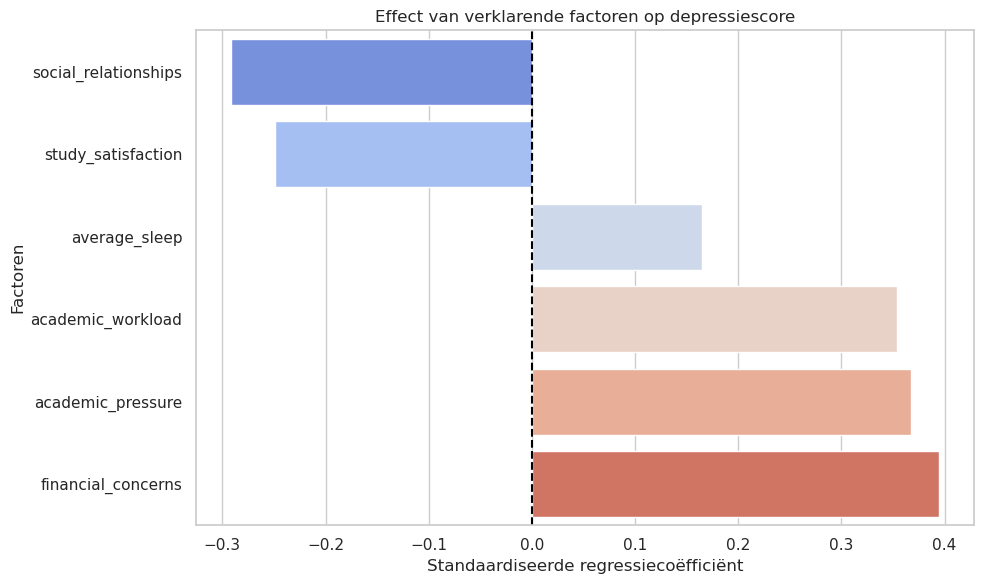

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# ⬇️ Laad je dataset (pas het pad aan naar jouw bestand)
da = pd.read_csv("datasets/MentalHealthSurvey.csv")

# 🔃 Voeg handmatig kolomnamen toe als ze ontbreken of overschreven moeten worden
da.columns = [
    'gender', 'age', 'university', 'degree_level', 'degree_major', 'academic_year',
    'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement',
    'average_sleep', 'study_satisfaction', 'academic_workload', 'academic_pressure',
    'financial_concerns', 'social_relationships', 'depression', 'anxiety',
    'isolation', 'future_insecurity', 'stress_relief_activities'
]

# 🔢 CGPA converteren naar gemiddelde getal (bijv. "3.0-3.5" → 3.25)
def convert_cgpa(value):
    if isinstance(value, str) and "-" in value:
        try:
            low, high = value.split("-")
            return (float(low) + float(high)) / 2
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['cgpa'] = da['cgpa'].apply(convert_cgpa)

# 💤 Slaaprange ("4-6 hrs") → gemiddeld aantal uur
def convert_sleep(value):
    if isinstance(value, str) and "-" in value:
        try:
            nums = [int(s.replace("hrs", "").strip()) for s in value.split("-")]
            return sum(nums) / len(nums)
        except:
            return None
    try:
        return float(value)
    except:
        return None

da['average_sleep'] = da['average_sleep'].apply(convert_sleep)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# 🔢 Definieer relevante variabelen
features = [
    'academic_workload',
    'academic_pressure',
    'financial_concerns',
    'study_satisfaction',
    'social_relationships',
    'average_sleep'
]
target = 'depression'

# 🧼 Filter en converteer naar numeriek
reg_df = da[features + [target]].dropna().astype(float)

# 🧪 X en y scheiden
X = reg_df[features]
y = reg_df[target]

# 🧮 Standaardiseer features voor eerlijke coëfficiëntenvergelijking
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 🔁 Lineaire regressie
model = LinearRegression()
model.fit(X_scaled, y)

# 📊 Visualiseer coëfficiënten
coefs = pd.Series(model.coef_, index=features).sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=coefs.values, y=coefs.index, palette="coolwarm", orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title("Effect van verklarende factoren op depressiescore")
plt.xlabel("Standaardiseerde regressiecoëfficiënt")
plt.ylabel("Factoren")
plt.tight_layout()
plt.show()